<h1><center>Análisis de Sistemas de Infraestructura <br>
    Taller 1: Manejo y Visualización de Datos de Infraestructura </center></h1>

<h2> 2. Análisis de datos de conectividad y reducción de dimensiones.</h2>

 Importar las librerías que usaremos en el taller

importing Jupyter notebook from Parte1.ipynb
Cuartil 3 año 2010 es 4.47
Cuartil 1 año 2010 es 2.25
El rango intercuartil año 2010 es 2.22
Limite de outliers superior año 2010 es 7.81
Limite de outliers inferior año 2010 es -1.08
Cuartil 3 año 2011 es 4.25
Cuartil 1 año 2011 es 2.55
El rango intercuartil año 2011 es 1.71
Limite de outliers superior año 2011 es 6.81
Limite de outliers inferior año 2011 es -0.01
Cuartil 3 año 2011 es 4.25
Cuartil 1 año 2011 es 2.55
El rango intercuartil año 2011 es 1.71
Limite de outliers superior año 2011 es 6.81
Limite de outliers inferior año 2011 es -0.01
Cuartil 3 año 2012 es 5.01
Cuartil 1 año 2012 es 3.03
El rango intercuartil año 2012 es 1.98
Limite de outliers superior año 2012 es 7.98
Limite de outliers inferior año 2012 es 0.06
Cuartil 3 año 2013 es 5.11
Cuartil 1 año 2013 es 3.27
El rango intercuartil año 2013 es 1.84
Limite de outliers superior año 2013 es 7.86
Limite de outliers inferior año 2013 es 0.52
Cuartil 3 año 2014 es 5.21
Cuartil 1 

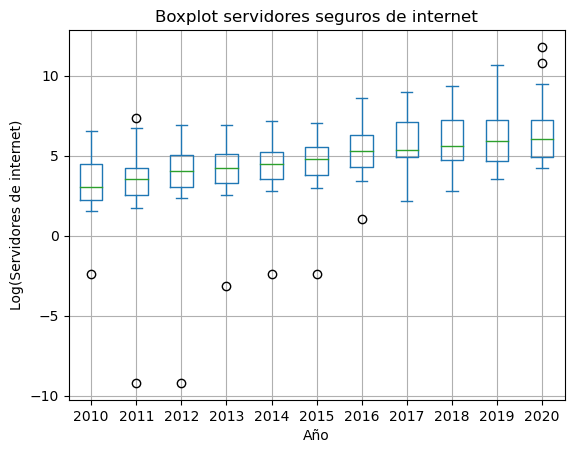

In [1]:
#Importar las librerías necesarias
#!pip install import_ipynb

import numpy as np #Libreria de operaciones matematicas y manejo de arrays numericos
import pandas as pd #Libreria para manejo de datos y estadistica
import matplotlib as mpl #Libreria para visualizacion de datos
import seaborn as sns #Libreria basada en Matplotlib con herramientas graficas avanzadas
import scipy.stats as st #Libreria con funciones estadisticas
import math 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import import_ipynb #Libreria para importar otros documentos ipynb
import Parte1 #Libreria de nuestro archivo primera parte del taller, para poder importarla de esta forma ambos archivos tienen que estar en una misma ruta (misma carpeta) 

%matplotlib inline

<h3> Importar los datos </h3>

In [2]:
#Importamos algunos DataFrame con los que trabajamos en la primera parte del taller 
from Parte1 import Acceso_electricidad, Servidores_internet, Kilometros_ferrocarriles, Telefonia_movil, Trafico_portuario, Vuelos_aerolineas_registradas

<h3>Genere un DataFrame que consigne la información de la última observación disponible de cada
variable para todos los países (Nota: Esto no es una serie de tiempo). Complete la información
faltante o elimine las entidades para la cuales no existe información suficiente.</h3>

In [3]:
#Toma la última columna de los datos 
AE_UD=Acceso_electricidad.iloc[:, -1]
KF_UD=Kilometros_ferrocarriles.iloc[:,-1]
SI_UD=Servidores_internet.iloc[:,-1]
TM_UD=Telefonia_movil.iloc[:,-1]
TP_UD=Trafico_portuario.iloc[:,-1]
VAR_UD=Vuelos_aerolineas_registradas.iloc[:,-1]

AE_UD #Para revisar visualmente que esta pasando con nuestros arreglos de datos

Country Name
Aruba           100.000000
Afghanistan      97.700000
Angola           48.223854
Albania         100.000000
Andorra         100.000000
                   ...    
Kosovo          100.000000
Yemen, Rep.      74.877197
South Africa     89.300000
Zambia           46.685116
Zimbabwe         48.979927
Name: 2021, Length: 218, dtype: float64

In [4]:
#Unir todo en un solo Dataframe
merged_inner = pd.merge(AE_UD,KF_UD, on='Country Name', how='outer')
merged_inner2=pd.merge(merged_inner,SI_UD, on='Country Name',how='outer')
merged_inner3=pd.merge(merged_inner2,TM_UD, on='Country Name',how='outer')
merged_inner4=pd.merge(merged_inner3,TP_UD, on='Country Name',how='outer')
df=pd.merge(merged_inner4,VAR_UD, on='Country Name',how='outer')
df.columns = ['AE','KF','SI','TM','TP','VAR']
df['KF'].fillna(0, inplace=True) #Llena con ceros los valores NA en ferrocarriles, esto es un supuesto
df #Para revisar visualmente que esta pasando con nuestros arreglos de datos

C:\Users\Admin\AppData\Local\Temp\ipykernel_12176\2058937746.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2021_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_inner4=pd.merge(merged_inner3,TP_UD, on='Country Name',how='outer')


,AE,KF,SI,TM,TP,VAR
Country Name,,,,,,
Aruba,100.000000,0.0,1585.588967,132.349628,57062.0,2276.000
Afghanistan,97.700000,0.0,34.947962,56.554435,NaN,2865.737
Angola,48.223854,0.0,19.743640,44.423732,700000.0,3805.000
Albania,100.000000,423.0,884.825091,92.319920,145762.0,1471.000
Andorra,100.000000,0.0,9665.379665,112.346585,NaN,NaN
...,...,...,...,...,...,...
"Yemen, Rep.",74.877197,0.0,5.234784,46.019542,418711.0,560.000
South Africa,89.300000,20953.0,14546.104926,168.924391,4415223.0,126160.109
Zambia,46.685116,1248.0,39.360271,103.974637,NaN,7071.541


In [5]:
df.dropna(how='any', inplace=True) #Elimina las filas que tengan algún valor incompleto
df #Para revisar visualmente que esta pasando con nuestros arreglos de datos

,AE,KF,SI,TM,TP,VAR
Country Name,,,,,,
Aruba,100.000000,0.0,1585.588967,132.349628,57062.00,2276.000
Angola,48.223854,0.0,19.743640,44.423732,700000.00,3805.000
Albania,100.000000,423.0,884.825091,92.319920,145762.00,1471.000
United Arab Emirates,100.000000,279.0,1496.776939,194.733621,19182000.00,234612.000
Argentina,100.000000,17866.0,3685.763129,130.455008,1791816.00,54218.000
...,...,...,...,...,...,...
Vietnam,100.000000,3159.0,3127.957716,138.865496,18359845.00,117353.000
Vanuatu,70.042770,0.0,359.337151,78.295147,77435.86,8552.000
Samoa,98.300000,0.0,474.575325,31.540839,41200.00,993.000


<h3>Con ayuda de una herramienta de visualización, enseñe cual de las variables presenta el mayor rango intercuartil ¿qué significa?</h3>

In [6]:
# Primero estandarizamos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled_data = pd.DataFrame(scaled_data,columns= list(df.columns))
df_scaled_data #Para revisar visualmente que esta pasando con nuestro arreglo de datos

,AE,KF,SI,TM,TP,VAR
0,0.566508,-0.332473,-0.390523,0.527788,-0.262966,-0.229766
1,-1.935500,-0.332473,-0.432896,-1.708221,-0.234762,-0.227700
2,0.566508,-0.309442,-0.409486,-0.490191,-0.259075,-0.230854
3,0.566508,-0.317283,-0.392926,2.114251,0.575994,0.084177
4,0.566508,0.640241,-0.333691,0.479607,-0.186867,-0.159580
...,...,...,...,...,...,...
142,0.566508,-0.160481,-0.348786,0.693491,0.539929,-0.074269
143,-0.881132,-0.332473,-0.423706,-0.846850,-0.262072,-0.221286
144,0.484358,-0.332473,-0.420588,-2.035840,-0.263662,-0.231500
145,-0.647516,-0.332473,-0.433288,-1.667638,-0.247102,-0.232085


In [7]:
#!pip install sentencepiece

In [8]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [9]:
#Analisis profundo de datos
from pandas_profiling import ProfileReport
ProfileReport(df_scaled_data)
# Presionando Toggle details se pueden encontrar estadísticas de las variables, incluyendo el rango intercuartil

C:\Users\Admin\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
C:\Users\Admin\AppData\Local\Temp\ipykernel_12176\1043102819.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import yda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

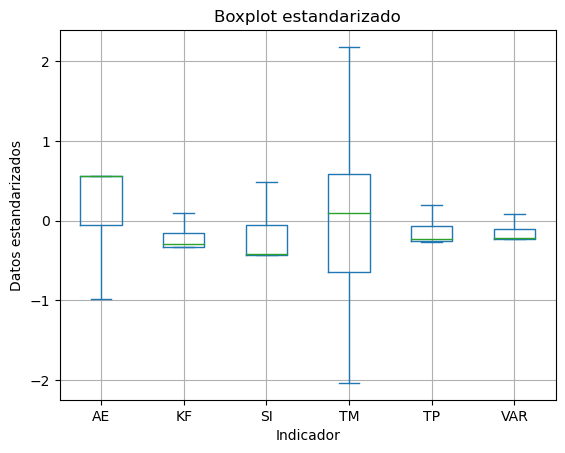

In [10]:
df_scaled_data.plot(kind='box',showfliers=False) #Grafica Blox-Plot
plt.title('Boxplot estandarizado')
plt.xlabel('Indicador')
plt.ylabel('Datos estandarizados')
plt.grid()

In [11]:
df_scaled_data['TM'].quantile([.25, .75]) # Así también podemos revisar el rango intercuartil

0.25   -0.641025
0.75    0.586835
Name: TM, dtype: float64

<h3> Construya el diagrama de frecuencia acumulada complementario para la variable del número de
vuelos de aerolíneas registradas, para los países que se encuentran en el cuartil superior ¿Cuál es la
probabilidad de excedencia del número de vuelos de aerolíneas registradas? Explique el significado
de ese valor.</h3>

In [12]:
#Estadisticas de mis datos 
mediana=df['VAR'].median()
Q3=df['VAR'].quantile(0.75)
Cuartil=df['VAR'].quantile([.5, .75])
Q1=df['VAR'].quantile(0.25)
df.loc[:,'VAR'].describe() #Estadisticas de mis datos 

print('La mediana es', round(mediana,3))
print('Q3 es', round(Q3,3))
print('Q1 es', round(Q1,3))

La mediana es 15982.0
Q3 es 95304.828
Q1 es 2172.5


In [13]:
df_Q=df['VAR'] #Creamos un dataframe solo con la columna de aerolineas registradas
df_Q=df_Q.sort_values(ascending=False) #organizamos 
df_Q

Country Name
United States         8005775.000
China                 3906386.000
South Asia             877794.064
Russian Federation     825994.000
India                  739481.000
                         ...     
Guatemala                  48.000
Namibia                    32.358
Estonia                    22.000
Montenegro                 20.000
Benin                      10.000
Name: VAR, Length: 147, dtype: float64

In [14]:
n=len(df) 
cont=(Q3<df_Q).sum() 
prob=cont*100/n 
print('La longitud de los datos es', n)
print('El número de valores por encima del cuartil Q3 es', cont)
print('Probabilidad de que un dato esté en el cuartil superior', round(prob,3))

La longitud de los datos es 147
El número de valores por encima del cuartil Q3 es 37
Probabilidad de que un dato esté en el cuartil superior 25.17


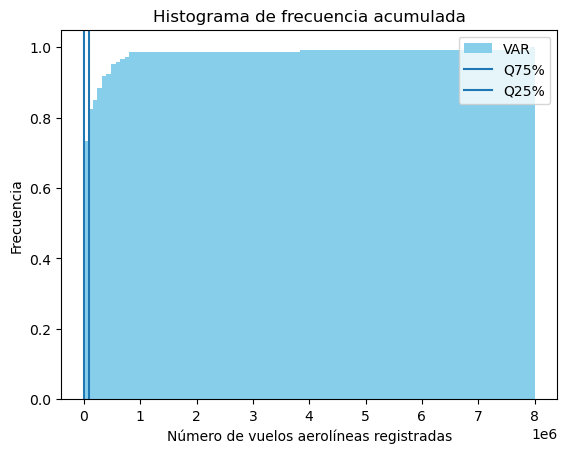

In [15]:
Hist_VAR_ac=df_Q.plot.hist(cumulative=True, density=1, color = "skyblue",bins=100) # Histograma de frecuencia acumulada
plt.title('Histograma de frecuencia acumulada')
plt.xlabel('Número de vuelos aerolíneas registradas')
plt.ylabel('Frecuencia')
plt.axvline(9.530483e+04, label='Q75%')
plt.axvline(2.172500e+03, label='Q25%')
plt.legend()

<h3>¿Puede concluir algo acerca del sesgo de la distribución del número de vuelos de aerolíneas registradas? Contraste sus conclusiones con la visualización del histograma de frecuencia relativa de
la variable. </h3>

Text(0, 0.5, 'Frecuencia')

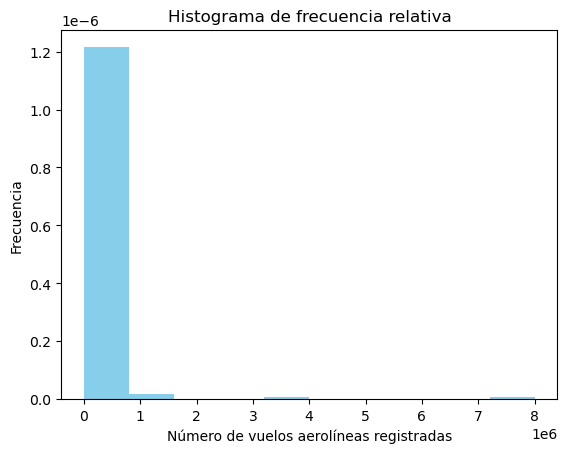

In [16]:
Hist_VAR_rel=df_Q.plot.hist(density=1, color = "skyblue") # Histograma de frecuencia relativa
plt.title('Histograma de frecuencia relativa')
plt.xlabel('Número de vuelos aerolíneas registradas')
plt.ylabel('Frecuencia')

<h3>Encuentre la matriz de varianzas y covarianzas ¿que tipo de dependencia lineal existe entre las
variables analizadas?</h3>

In [17]:
CountryName=df.index #Los países como índices
df_array = df.to_numpy() #lo convierto en array

cov=np.matmul(df_array.T,df_array)/n #Cov Matrix
print('La matriz de covarianza es:')
print(cov)

La matriz de covarianza es:
[[8.22102448e+03 5.98801978e+05 1.59747564e+06 1.02236648e+04
  5.93048681e+08 1.69122890e+07]
 [5.98801978e+05 3.74642984e+08 2.40307236e+08 7.30564824e+05
  2.93704536e+11 1.26423931e+10]
 [1.59747564e+06 2.40307236e+08 1.62215040e+09 2.05151694e+06
  1.57587983e+11 9.98668492e+09]
 [1.02236648e+04 7.30564824e+05 2.05151694e+06 1.39998442e+04
  7.66673360e+08 1.99752994e+07]
 [5.93048681e+08 2.93704536e+11 1.57587983e+11 7.66673360e+08
  5.56279412e+14 1.13385822e+13]
 [1.69122890e+07 1.26423931e+10 9.98668492e+09 1.99752994e+07
  1.13385822e+13 5.77375852e+11]]


<h3>Por medio de PCA, encuentre un indicador de conectividad ¿Qué porcentaje de la información
se conserva con el indicador, i.e. primer componente? ¿cuántos componentes son necesarios para
conservar el 80%, 90% y 95% de la información?</h3>


In [18]:
pca = PCA()
pca.fit(df_scaled_data)
lam_norm = pca.explained_variance_ratio_ # varianza explicada 


acumulada = []
a = 0
for i in lam_norm: 
    
    a += i
    
    acumulada.append(a)
    
print(acumulada)
print(pca.explained_variance_ratio_)

[0.42496430430374943, 0.6707436301628357, 0.8161450132578838, 0.9060386047236056, 0.9762312730185638, 0.9999999999999999]
[0.4249643  0.24577933 0.14540138 0.08989359 0.07019267 0.02376873]


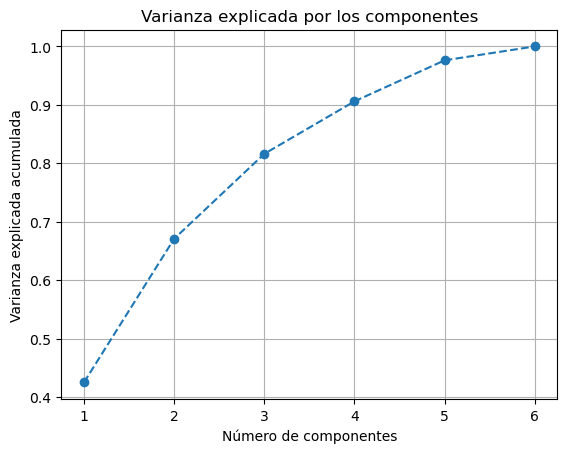

In [19]:
#plt.figure(figsize =(8,6))
plt.plot(range(1, len(df.columns)+1),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Varianza explicada por los componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid()

In [20]:
pca = PCA(n_components = 4) # Definimos el numero de componentes 
pca.fit(df_scaled_data) # Ajustamos

#Proyectamos al nuevo espacio

scores_pca = pca.transform(df_scaled_data)

#Cálculamos el indicador

indicador = []

for i in range(len(scores_pca)):
    indicador.append(np.sum(scores_pca[i]*pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_))

#Devolvemos el indicador a dataframe y le asiganmos como index el nombre del país
    
Indicador = pd.DataFrame(indicador,index=CountryName, columns = ['Indicador de conectividad'])
Indicador.reset_index(inplace=True)

# Convertimos el indicador para que esté entre cero y uno, usamos Min-Max

def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

Indicador_norm = minmax_norm(Indicador['Indicador de conectividad'])
Indicador_norm = pd.DataFrame(np.array(Indicador_norm),index=CountryName, columns = ['Indicador de conectividad'])
Indicador_norm.reset_index(inplace=True)
Indicador_norm

,Country Name,Indicador de conectividad
0,Aruba,0.184883
1,Angola,0.035089
2,Albania,0.145560
3,United Arab Emirates,0.273606
4,Argentina,0.219085
...,...,...
142,Vietnam,0.220370
143,Vanuatu,0.094558
144,Samoa,0.082808
145,"Yemen, Rep.",0.068358


<h3>Genere una visualización (e.g. Cloropeth en phyton) del indicador generado en el numeral anterior.
Mencione dos de los países con mayor conectividad y dos de los países con menor conectividad.
Concluya.</h3>

In [21]:
#!pip install folium # Activar esta linea si no se tiene instalado folium

import folium

In [22]:
world_geo = r'world_countries.json' # geojson file completar la ruta
world_map = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Terrain')

In [23]:
threshold_scale = np.linspace(Indicador_norm['Indicador de conectividad'].min(),
                              Indicador_norm['Indicador de conectividad'].max(),
                              11, dtype=float)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = 1
threshold_scale[0] = 0 #threshold_scale[0] - 1 # make sure that the last value of the list is greater than the maximum immigration
world_map.choropleth(geo_data=world_geo,
                     data=Indicador_norm,columns=['Country Name','Indicador de conectividad'],
                     key_on='feature.properties.name',
                     threshold_scale=threshold_scale,fill_color= 'RdYlGn',
                     fill_opacity=0.7,
                     line_opacity=0.2,
                     legend_name='Indicador de conectividad')
world_map #Visualizar el mapa

C:\Users\Admin\anaconda3\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [24]:
#Para ver los dos primeros y los dos ultimos paises organizamos el indicador 
Indicador_norm.sort_values(ascending=False,by='Indicador de conectividad')

,Country Name,Indicador de conectividad
140,United States,1.000000
21,China,0.761339
34,Denmark,0.580793
57,"Hong Kong SAR, China",0.485070
119,Singapore,0.417605
...,...,...
85,Madagascar,0.031435
92,Mozambique,0.018243
24,"Congo, Dem. Rep.",0.011729
108,Papua New Guinea,0.006956


<h2> BONO </h2>

In [33]:
def PCA_function(datos):   #Recibe un dataframe de pandas que contenga solo valores numéricos correspondientes a las variables. 
                           #Filas = observaciones, columnas = variables
                           #Index = identificador de observación, columna[0] = primera observación para la variable K
    #Estandarización
    
    scaler = StandardScaler()     #Instanciar
    scaled_data = scaler.fit_transform(datos)      #Estandarizar
    df_scaled_data = pd.DataFrame(scaled_data,columns= list(datos.columns))    #Regresar a dataframe de pandas
    
    #Cálculo del PCA
    
    pca = PCA()      #Instanciar
    pca.fit(df_scaled_data)       #Calcular los componentes principales
    lam_norm = pca.explained_variance_ratio_ #Varianza explicada
    componentes = pca.components_
    
    for i in range(len(componentes)): 
        
        print("El ",i+1," componente principal v=",componentes[i],' explica el porcentaje de varianza ',lam_norm[i]*100,'% .\n')
    
    return 

In [34]:
PCA_function(df)

El  1  componente principal v= [0.22168338 0.56254762 0.24733352 0.1601668  0.4831552  0.56047339]  explica el porcentaje de varianza  42.49643043037494 % .

El  2  componente principal v= [ 0.61333438 -0.19048092  0.32026275  0.63599143 -0.18085526 -0.21857722]  explica el porcentaje de varianza  24.577932585908627 % .

El  3  componente principal v= [-0.18355535 -0.02042533  0.86714918 -0.32919545 -0.31573928  0.07669157]  explica el porcentaje de varianza  14.540138309504814 % .

El  4  componente principal v= [-0.73106679 -0.06109358  0.1454238   0.64662426  0.14786632 -0.0259511 ]  explica el porcentaje de varianza  8.98935914657218 % .

El  5  componente principal v= [ 0.06991347 -0.4041538   0.24224186 -0.20632759  0.78228572 -0.34430897]  explica el porcentaje de varianza  7.019266829495818 % .

El  6  componente principal v= [-0.04047605  0.69265235  0.06694021 -0.02824597  0.01804811 -0.7162331 ]  explica el porcentaje de varianza  2.3768726981436075 % .

